In [175]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# Source

In [217]:
folder = "temp/prog_vjkbmxwjho"

## Get data

In [218]:
home = os.getcwd() + "/"
srcfolder = home + folder
ID = getID(srcfolder)
Nq, Nc, Nt, wq, shift, wc, Ec, g, sb, t0, t1, t2, t3, tg, anh_appr, gauss, smooth, Q, convergent, Np, H, psi0, e_ops, options, eps, wd, epsq, epsc, dw, wdq, wdc = getparams(srcfolder)
quants = getquants(srcfolder)
times, states, expect, e0, g1, e1, g0, coupling = load_data(quants, srcfolder)
if Nt == 1:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg, 'Q'  : Q,
              'gauss' : gauss, 'smooth' : smooth, 'convergent' : convergent, 'Nt' : Nt, 'wd' : wd}
elif Nt == 2:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg, 'Q'  : Q, 'gauss' : gauss,
              'smooth' : smooth, 'convergent' : convergent, 'Nt' : Nt, 'wdq' : wdq, 'wdc' : wdc}

In [219]:
""" SIDEBAND COUPLING """

smoothen_method = 'savgol'

if 'e0' in quants:
    e0_macro, e0_macro_times = remove_micromotion(e0, times, method=smoothen_method)
if 'g0' in quants:
    g0_macro, g0_macro_times = remove_micromotion(g0, times, method=smoothen_method)
if 'e1' in quants:
    e1_macro, e1_macro_times = remove_micromotion(e1, times, method=smoothen_method)
if 'g1' in quants:
    g1_macro, g1_macro_times = remove_micromotion(g1, times, method=smoothen_method)
if ('e1' in quants and 'g0' in quants):
    e1g0_macro, e1g0_macro_times = remove_micromotion(e1-g0, times, method=smoothen_method)
if ('e0' in quants and 'g1' in quants):
    e0g1_macro, e0g1_macro_times = remove_micromotion(e0-g1, times, method=smoothen_method)

if sb == 'red':
    wsb = sideband_freq(e0g1_macro, e0g1_macro_times)
elif sb == 'blue':
    wsb = sideband_freq(e1g0_macro, e1g0_macro_times)

print("wsb =", wsb/2/pi, "GHz")

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

## Visualize data

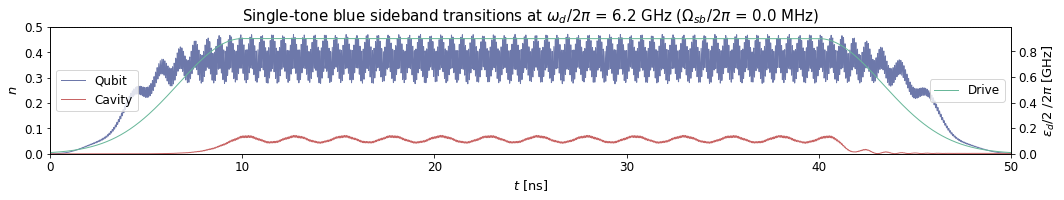

In [220]:
""" EXPECTATION VALUES """
wsb=0
xlim = None
ylim = None

if sb == 'red':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wsb=wsb, epsq=epsq, epsc=epsc)
elif sb == 'blue':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wsb=wsb, epsq=epsq, epsc=epsc)

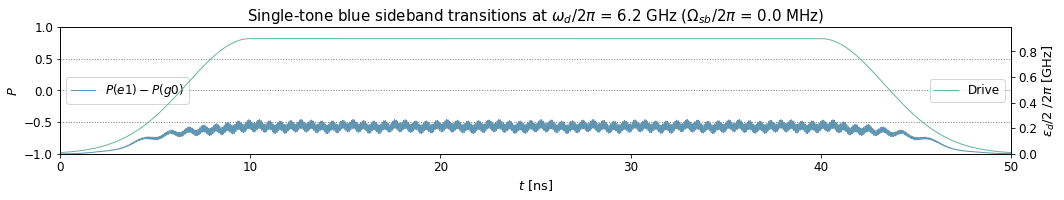

In [221]:
"""COMBINED PROBABILITIES"""

xlim = None#[0, 3]
ylim = None#[0.99, 1.01]

if sb == 'red':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e0=e0, g1=g1, wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e0=e0, g1=g1, wsb=wsb, epsq=epsq, epsc=epsc)
elif sb == 'blue':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e1=e1, g0=g0, wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e1=e1, g0=g0, wsb=wsb, epsq=epsq, epsc=epsc)

# Play around

In [222]:
def extrema(x, times):
    """
    Determines all extrema in a given sequence with corresponding time values.
    First and last element of x are always returned.
    
    Input
    -----
    x : array-like
        Values from which to determine the extrema
    times : array-like
        Corresponding time values
    
    Returns
    -------
    maxima : list
        All maxima from x
    t_maxima : list
        Corresponding values from times for maxima
    n_maxima : list
        Indeces of maxima in x
    minima : list
        All minima from x
    t_minima : list
        Corresponding values from times for minima
    n_minima : list
        Indeces of minima in x
    """
    
    maxima = list()
    t_maxima = list()
    n_maxima = list()
    minima = list()
    t_minima = list()
    n_minima = list()
    
    for n, value, t in zip(range(len(x)), x, times):
        
        # If first element
        if (n == 0 and value > x[1]):
            maxima.append(value)
            t_maxima.append(t)
            n_maxima.append(n)
        elif (n == 0 and value < x[1]):
            minima.append(value)
            t_minima.append(t)
            n_minima.append(n)
        
        # If last element
        elif (n == len(x)-1 and value > x[1]):
            maxima.append(value)
            t_maxima.append(t)
            n_maxima.append(n)
        elif (n == len(x)-1 and value < x[1]):
            minima.append(value)
            t_minima.append(t)
            n_minima.append(n)
        
        # Check if maximum
        elif (value > x[n-1] and value > x[n+1]):
            maxima.append(value)
            t_maxima.append(t)
            n_maxima.append(n)
        
        # Check if minimum
        elif (value < x[n-1] and value < x[n+1]):
            minima.append(value)
            t_minima.append(t)
            n_minima.append(n)
    
    return maxima, t_maxima, n_maxima, minima, t_minima, n_minima

In [223]:
def remove_micromotion(x, times, method='savgol', window_length=1001, order=2, **kwargs):
    """
    Removes micromotion from input signal x by a specified method.
    
    Input
    -----
    x : array-like
        Signal to remove the micromotion from
    times : array-like
        Corresponding time values of signal
    method : str
        Method to use to remove micromotion. The options are:
        - 'bisect' : determines all local maxima and minima,
          and subsequently draws the output on the bisection
          of two subsequent extrema; or
        - 'savgol' : Savitzky-Golay filter; or
        - 'lowpass' : cuts off Fourier spectrum after some value
    window_length : int
        Window length in case of Savitzky-Golay filter
    order : int
        Polynomial order in case of Savitzky-Golay filter
    
    Returns
    -------
    xnew : list, np.array
        New signal
    times : list, np.array
        Corresponding time values
    """
    
    if method == 'bisect':
        xnew = list()
        tnew = list()
        maxima, t_maxima, _, minima, t_minima, _ = extrema(x, times)
        
        supports = copy(maxima)
        supports.extend(minima)
        t_supports = copy(t_maxima)
        t_supports.extend(t_minima)
        supports_zipped = sorted(zip(t_supports, supports))
        t_supports, supports = zip(*supports_zipped)
        
        for interval in range(1, len(supports)):
            maxval = max(supports[interval-1], supports[interval])
            minval = min(supports[interval-1], supports[interval])
            xnew.append(minval + (maxval - minval)/2)
            tnew.append(t_supports[interval-1] + (t_supports[interval] - t_supports[interval-1])/2)
            
    elif method == 'savgol':
        xnew = savgol_filter(x, window_length, order)
    
    elif method == 'lowpass':
        global spectrum, freqs
        spectrum = np.fft.fft(x)
        freqs = np.fft.fftfreq(len(times))*100
        _, _, _, minima, _, n_minima = extrema(spectrum, times)
#         spectrum[n_minima[1]+1 :] = np.zeros(len(spectrum) - n_minima[1]-1).tolist()
        xnew = np.fft.ifft(spectrum)
        print("WARNING: lowpass filter does not yet give appropriate results")
        
    return np.asarray(xnew), np.asarray(times)

In [224]:
def cluster(x, t, out='extremum'):
    """
    Determines clusters of subsequent maxima or minima in the data
    and return a single point per cluster.
    
    Input
    -----
    x : array-like
        Values of maxima and minima
    t : array-like
        Corresponding time values
    out : str
        Location of output points. Options are:
        'centroid' : return cluster centroid, or
        'extremum' : return maximum or minimum
    
    Returns
    -------
    xlocs : list
        Cluster locations
    tlocs : list
        Corresponding time values
    """
    
    if isinstance(x, np.ndarray):
        x = x.tolist()
    if isinstance(t, np.ndarray):
        t = t.tolist()
    
    # Determine clusters
    xmin = min(x)
    xmax = max(x)
    k = 0
    classified = [(0, 0)]
    
    if abs(x[0] - xmax) < abs(x[0] - xmin):
        pole = 1
    elif abs(x[0] - xmax) > abs(x[0] - xmin):
        pole = -1
    
    poles = [pole]
    
    for n, val in enumerate(x):
        if n != 0:
            if abs(val - xmax) < abs(val - xmin):
                newpole = 1
            elif abs(val - xmax) > abs(val - xmin):
                newpole = -1
            if newpole == pole:
                classified.append((n, k))
            elif newpole != pole:
                pole = copy(newpole)
                k += 1
                classified.append((n, k))
                poles.append(pole)
    
    clustered = list()
    for key, group in groupby(classified, key=itemgetter(1)):
        inds = [item[0] for item in group]
        clustered.append(inds)
    
    # Calculate output per cluster
    xlocs = list()
    tlocs = list()
    
    for ic, cluster in enumerate(clustered):
        if out == 'centroid':
            xtot = 0
            ttot = 0
            for i in cluster:
                xtot += x[i]
                ttot += t[i]
            xlocs.append(xtot/len(cluster))
            tlocs.append(ttot/len(cluster))
        
        elif out == 'extremum':
            if poles[ic] == 1:
                xmax = max(x[cluster[0] : cluster[-1] +1])
                tmax = t[x.index(xmax)]
                xlocs.append(xmax)
                tlocs.append(tmax)
            elif poles[ic] == -1:
                xmin = min(x[cluster[0] : cluster[-1] +1])
                tmin = t[x.index(xmin)]
                xlocs.append(xmin)
                tlocs.append(tmin)
    
    return xlocs, tlocs

In [225]:
def sideband_freq(x, times, rm_micromotion=False, method='savgol', tg=10, rtol=0.5, **kwargs):
    """
    Determines the sideband transition frequency in [GHz] based on
    expectation values.
    If the micromotion is not already removed from the signal, rm_micromotion
    should be set to True.
    
    Input
    -----
    x : array-like
        Signal to determine the sideband transition frequency from
    times : array-like
        Corresponing time values
    rm_micromotion : bool
        Remove micromotion from x
    method : str
        Method to use for removal of the micromotion. Consult the
        remove_micromotion function for the possible parameters
    tg : float
        Time of Gaussian rise and fall
    rtol : float
        Ratio between distance to mean and distance to extrema to tolerate.
        All points closer to the mean than rtol times the distance to the
        global extrema are removed
    
    Returns
    -------
    wsb*2*pi : float
        Sideband transition frequency [rad/s]
    """
    
    if rm_micromotion:
        x, times = remove_micromotion(x, times, method)
    
    maxima, t_maxima, _, minima, t_minima, _ = extrema(x[1000:-1000], times[1000:-1000])
    supports = copy(maxima)
    supports.extend(minima)
    t_supports = copy(t_maxima)
    t_supports.extend(t_minima)
    
    supports_zipped = sorted(zip(t_supports, supports))
    t_supports, supports = zip(*supports_zipped)
    supports, t_supports = cluster(supports, t_supports)
    
    # Remove supports due to remaining oscillations in filtered signal close to signal mean
    news = list()
    newt = list()
    for s in supports:
        d_to_max = abs(s - max(supports))
        d_to_min = abs(s - min(supports))
        d_to_mid = abs(s - min(supports) - (max(supports)-min(supports))/2)
        if ( d_to_mid < rtol*d_to_max and d_to_mid < rtol*d_to_min ):
            pass
        else:
            news.append(s)
            newt.append(t_supports[supports.index(s)])
    
    supports = copy(news)
    t_supports = copy(newt)
    if max(t_supports) > max(times)-tg:  # if last cluster within Gaussian fall
        supports = supports[1:-1]  # remove first and last element
        t_supports = t_supports[1:-1]  # remove first and last element
    else:
        supports = supports[1:]  # remove first element
        t_supports = t_supports[1:]  # remove first element
    
    if len(supports) < 2:
        print("WARNING: not enough sideband oscillations to determinde frequency,")
        print("         increase the simulation time")
        return 0
    elif len(supports) == 2:
        print("WARNING: not enough sideband oscillations to accurately determinde frequency,")
        print("         increase the simulation time for a more accurate result")
        dts = np.diff(t_supports)
        Tsb = 2*np.mean(dts)  # sideband transition period [ns]
        wsb = 1/Tsb  # sideband transition frequency [GHz]
        return wsb*2*pi
    else:
        dts = np.diff(t_supports)
        Tsb = 2*np.mean(dts)  # sideband transition period [ns]
        wsb = 1/Tsb  # sideband transition frequency [GHz]
        return wsb*2*pi
    return supports, t_supports, maxima, t_maxima

In [226]:
# e1_macro, e1_macro_times = remove_micromotion(e1, times, 'lowpass')
# g0_macro, g0_macro_times = remove_micromotion(g0, times, 'lowpass')
e1g0_macro, e1g0_macro_times = remove_micromotion(e1-g0, times, 'savgol')
supports, t_supports, maxima, t_maxima = sideband_freq(e1g0_macro, e1g0_macro_times)

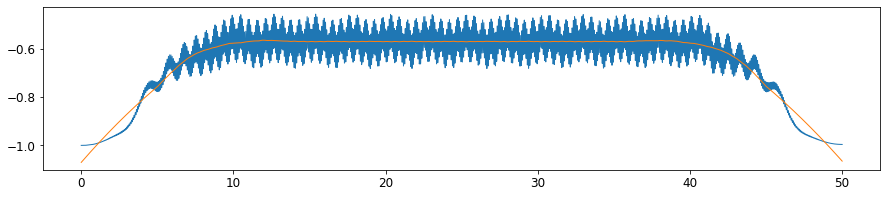

In [227]:
plt.figure(figsize=(15,3))
plt.plot(times, e1-g0)
plt.plot(e1g0_macro_times, e1g0_macro)
plt.scatter(t_supports, supports, c='r')
# plt.xlim([980, 992])
# plt.ylim([-1, -0.9])
plt.show()

[ 0.    0.02  0.04 ... -0.06 -0.04 -0.02]


(-1, 1)

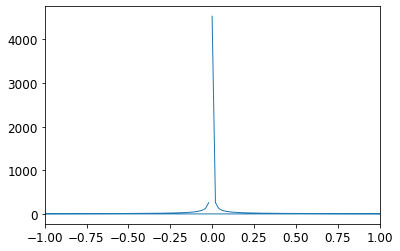

In [234]:
print(freqs)
plt.plot(freqs, abs(spectrum))
plt.xlim([-1, 1])

In [229]:
print(freqs[abs(spectrum).tolist().index(max(abs(spectrum)))])

0.0


In [231]:
print(t_supports)

[11.98239647929586, 38.09761952390478]
